In [84]:
# Data analysis and Cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

In [86]:
# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.pipeline import Pipeline as IMBPipeline

In [87]:
# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report,precision_recall_curve

#### Load the Data

In [88]:
# Load Data
sheet_id="1uiQfhlb0isYp2JefSVzIJOngN0viwsP0PzcMab-dUw8"
sheet_name="Sheet1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df=pd.read_csv(url)

#### Data Investigation

In [89]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [90]:
df.shape

(583, 11)

In [91]:
df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [93]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [94]:
df.duplicated().sum()

np.int64(13)

In [95]:
df = df.drop_duplicates()

In [96]:
df.duplicated().sum()

np.int64(0)

In [97]:
df = df.drop(columns=['Gender'])

In [98]:
df['Dataset'] = df['Dataset'].replace({2:0, 1:1})

### EDA

C:\Users\Madhu\AppData\Local\Temp\ipykernel_7052\3272877950.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dataset', data=df, palette='coolwarm')
C:\Users\Madhu\AppData\Local\Temp\ipykernel_7052\3272877950.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


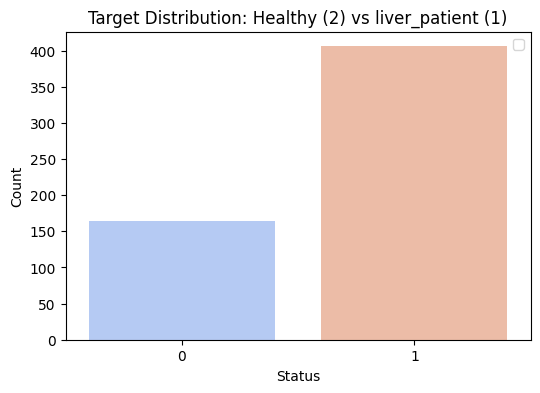

In [99]:
#Check class balance
plt.figure(figsize=(6,4))
sns.countplot(x='Dataset', data=df, palette='coolwarm')
plt.title("Target Distribution: Healthy (2) vs liver_patient (1)")
plt.legend()
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

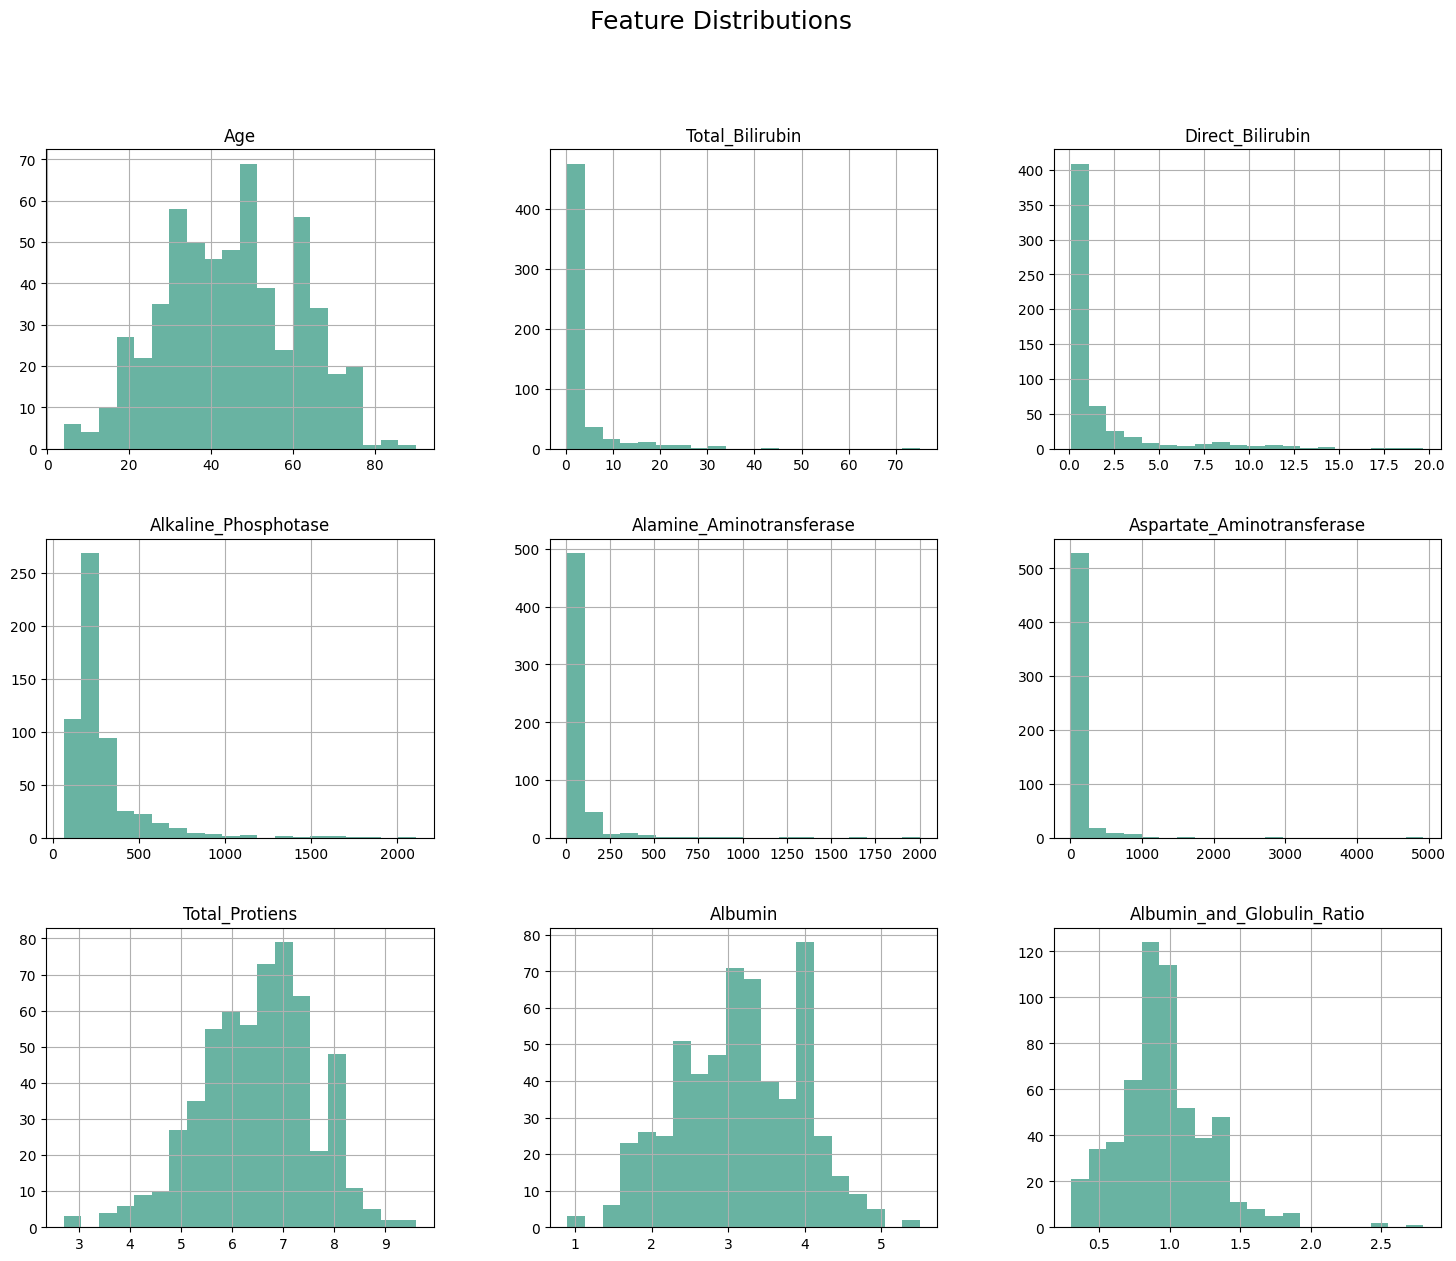

In [100]:
#Feature Distributions
numeric_features = df.select_dtypes(include='number').columns.drop('Dataset')

df[numeric_features].hist(bins=20, figsize=(18, 14), color='#69b3a2')
plt.suptitle("Feature Distributions", fontsize=18)
plt.show()

C:\Users\Madhu\AppData\Local\Temp\ipykernel_7052\2919617893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y=col, data=df, palette='Set2')


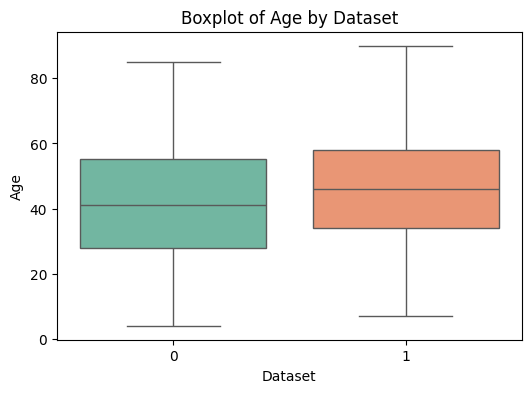

C:\Users\Madhu\AppData\Local\Temp\ipykernel_7052\2919617893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y=col, data=df, palette='Set2')


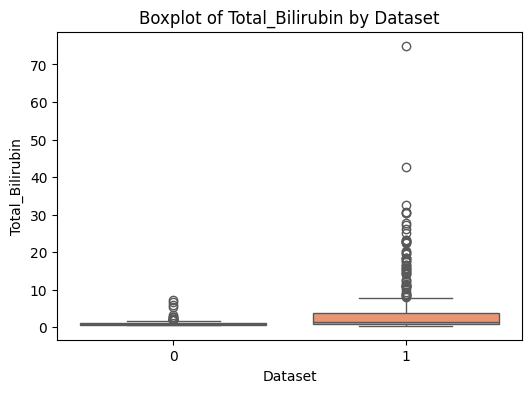

C:\Users\Madhu\AppData\Local\Temp\ipykernel_7052\2919617893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y=col, data=df, palette='Set2')


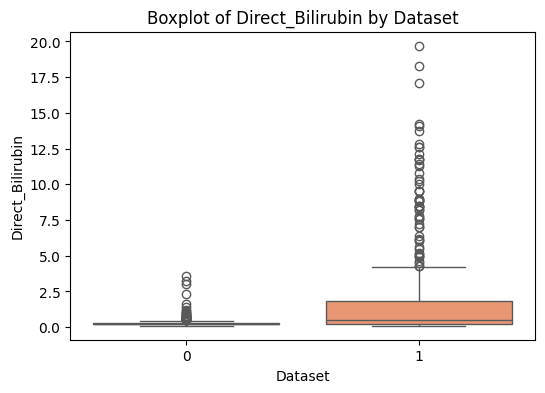

C:\Users\Madhu\AppData\Local\Temp\ipykernel_7052\2919617893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y=col, data=df, palette='Set2')


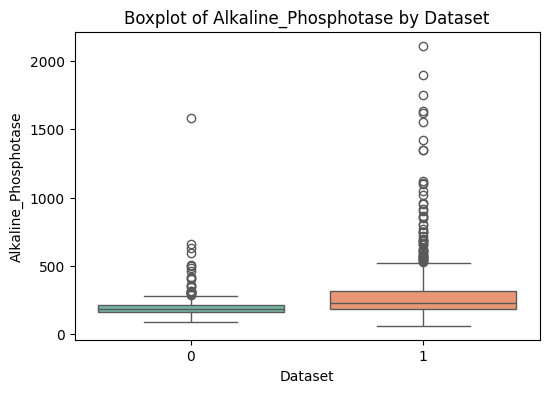

C:\Users\Madhu\AppData\Local\Temp\ipykernel_7052\2919617893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y=col, data=df, palette='Set2')


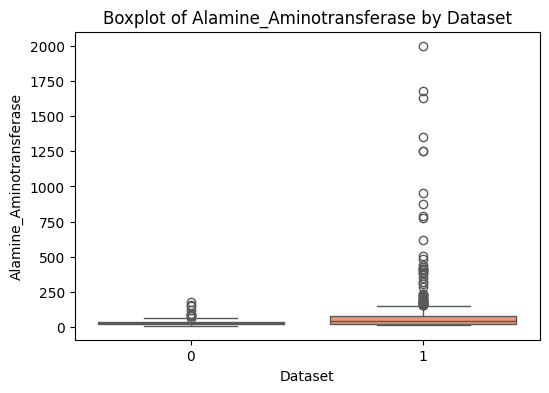

C:\Users\Madhu\AppData\Local\Temp\ipykernel_7052\2919617893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y=col, data=df, palette='Set2')


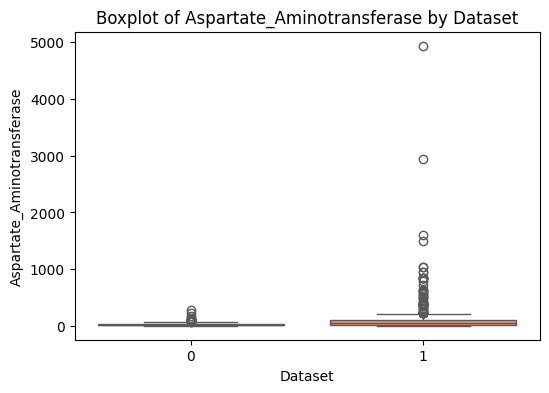

C:\Users\Madhu\AppData\Local\Temp\ipykernel_7052\2919617893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y=col, data=df, palette='Set2')


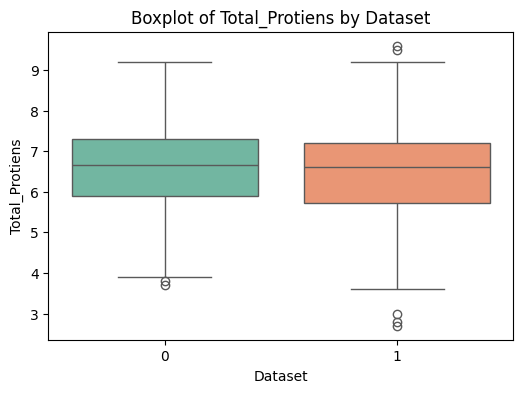

C:\Users\Madhu\AppData\Local\Temp\ipykernel_7052\2919617893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y=col, data=df, palette='Set2')


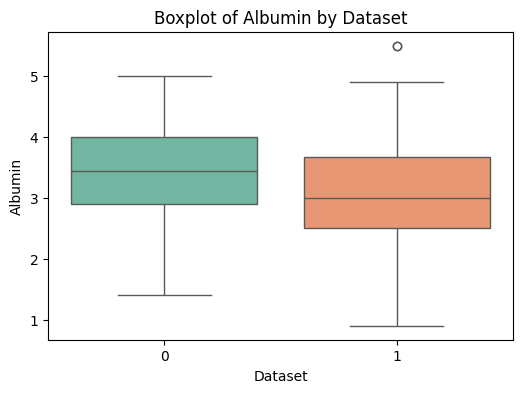

C:\Users\Madhu\AppData\Local\Temp\ipykernel_7052\2919617893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y=col, data=df, palette='Set2')


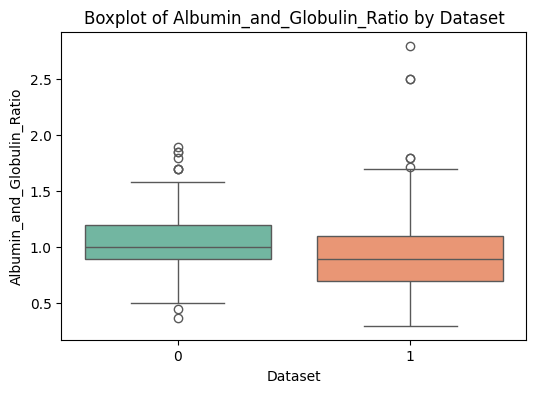

In [101]:
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Dataset', y=col, data=df, palette='Set2')
    plt.title(f"Boxplot of {col} by Dataset")
    plt.show()

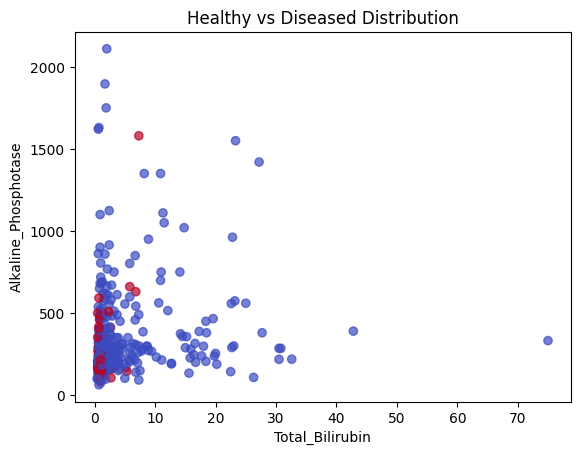

In [102]:
plt.scatter(df['Total_Bilirubin'], df['Alkaline_Phosphotase'], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('Total_Bilirubin')
plt.ylabel('Alkaline_Phosphotase')
plt.title('Healthy vs Diseased Distribution')
plt.show()

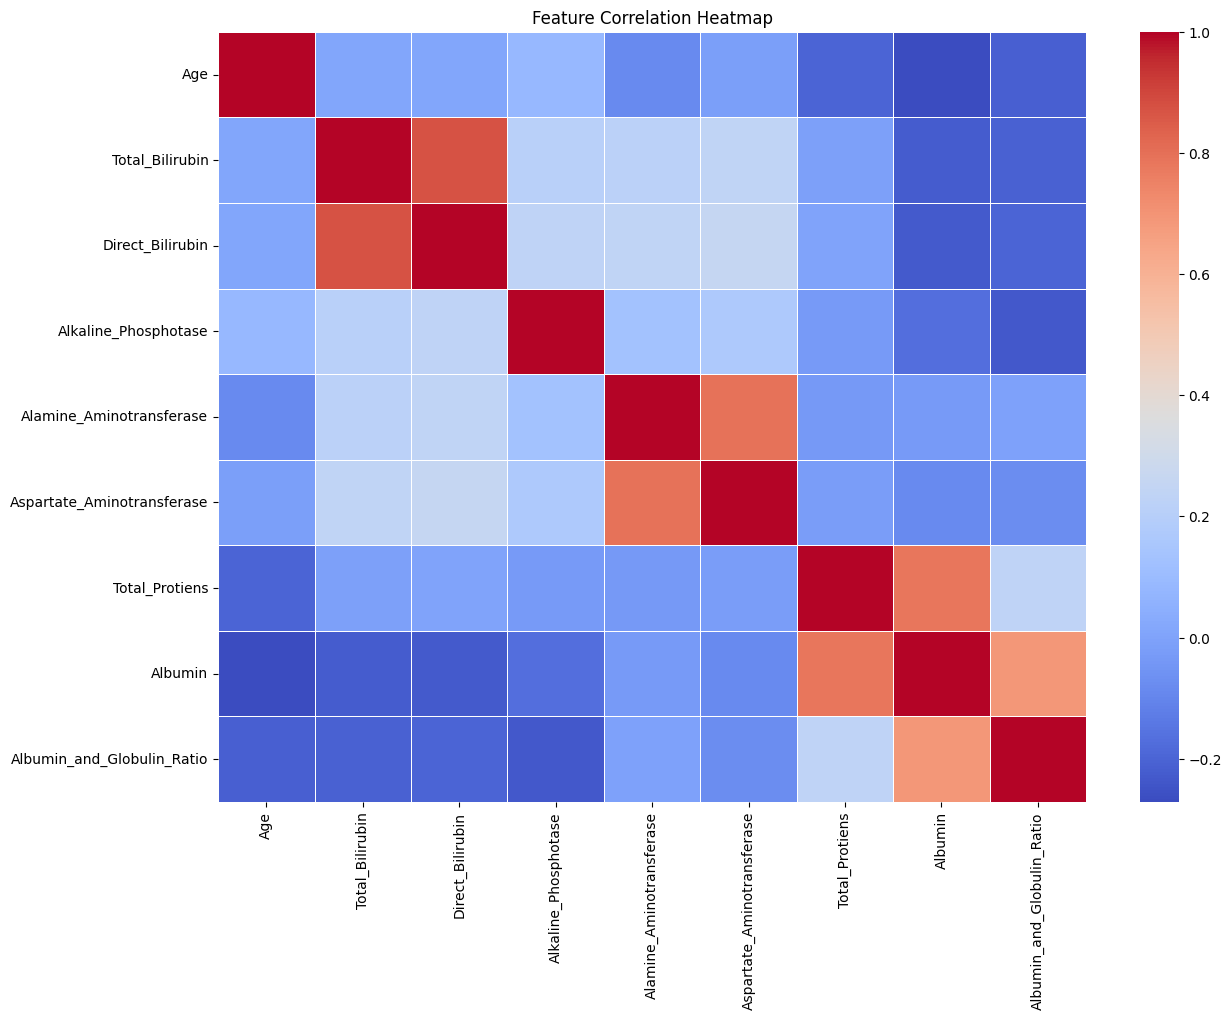

In [103]:
# Correlation Heatmap
plt.figure(figsize=(14,10))
corr = df[numeric_features].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### Seperating X and y

In [104]:
X=df.drop('Dataset',axis=1) # Features
y=df['Dataset']             # Target
# 2 - healthy
# 1 - unhealthy

In [105]:
df['Dataset'].value_counts()

Dataset
1    406
0    164
Name: count, dtype: int64

### Feature Selection

In [106]:
from scipy.stats import ttest_ind

for col in X:
    # Class A and B scores
    class_a = df[df['Dataset']==0][col]
    class_b = df[df['Dataset']==1][col]

    # Perform two-sample t-test (assume equal variances)
    t_stat, p_val = ttest_ind(class_a, class_b,nan_policy='omit')
    print(f"Feature: {col}")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_val:.6f}")

    # Interpretation
    alpha = 0.05
    if p_val < alpha:
        print("Reject the null hypothesis: ✅ class averages are significantly different.")
    else:
        print("Fail to reject the null hypothesis:❌No significant difference.")
    print("-"*60)

Feature: Age
t-statistic: -3.3230
p-value: 0.000948
Reject the null hypothesis: ✅ class averages are significantly different.
------------------------------------------------------------
Feature: Total_Bilirubin
t-statistic: -5.4888
p-value: 0.000000
Reject the null hypothesis: ✅ class averages are significantly different.
------------------------------------------------------------
Feature: Direct_Bilirubin
t-statistic: -6.1711
p-value: 0.000000
Reject the null hypothesis: ✅ class averages are significantly different.
------------------------------------------------------------
Feature: Alkaline_Phosphotase
t-statistic: -4.5508
p-value: 0.000007
Reject the null hypothesis: ✅ class averages are significantly different.
------------------------------------------------------------
Feature: Alamine_Aminotransferase
t-statistic: -3.9105
p-value: 0.000103
Reject the null hypothesis: ✅ class averages are significantly different.
------------------------------------------------------------
Fe

In [107]:
selected_features = [
    'Age',
    'Total_Bilirubin',
    'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin'
]

In [108]:
df.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [109]:
X=df[selected_features]
y=df['Dataset']

#### PreProcessing

In [110]:
Num_trans=Pipeline(steps=[
    ('Imputer',SimpleImputer(strategy='median')),
    ('Scaler',StandardScaler())
])

In [111]:
Preprcess=ColumnTransformer(transformers=[
        ('Num_continues',Num_trans,X.columns)
])
Preprcess

,transformers,"[('Num_continues', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((456, 8), (114, 8), (456,), (114,))

### Model Creation

In [113]:
Lg_pipeline=IMBPipeline(steps=[
    ('Preprcess',Preprcess),
    ('Sampling',SMOTE(random_state=42)),
    ('Model',LogisticRegression(class_weight='balanced',max_iter=100))

])

Lg_pipeline.fit(X_train,y_train)

y_train_pred=Lg_pipeline.predict(X_train)
y_test_pred=Lg_pipeline.predict(X_test)

print('Confusion Matrix')
print('Train',confusion_matrix(y_train,y_train_pred))
print('Test',confusion_matrix(y_test,y_test_pred))
print('--'*50)

print('Evaluation on training data')
print(classification_report(y_train,y_train_pred))

print('Evaluation on testing data')
print(classification_report(y_test,y_test_pred))

Confusion Matrix
Train [[115  20]
 [133 188]]
Test [[22  7]
 [37 48]]
----------------------------------------------------------------------------------------------------
Evaluation on training data
              precision    recall  f1-score   support

           0       0.46      0.85      0.60       135
           1       0.90      0.59      0.71       321

    accuracy                           0.66       456
   macro avg       0.68      0.72      0.66       456
weighted avg       0.77      0.66      0.68       456

Evaluation on testing data
              precision    recall  f1-score   support

           0       0.37      0.76      0.50        29
           1       0.87      0.56      0.69        85

    accuracy                           0.61       114
   macro avg       0.62      0.66      0.59       114
weighted avg       0.75      0.61      0.64       114



In [114]:
Lg_pipeline=IMBPipeline(steps=[
    ('Preprcess',Preprcess),
    ('Sampling',SMOTE(random_state=42)),
    ('Model',LogisticRegression(class_weight='balanced',max_iter=500,C=1,penalty='l2'))

])


Lg_pipeline.fit(X_train,y_train)

y_train_pred=Lg_pipeline.predict(X_train)
y_test_pred=Lg_pipeline.predict(X_test)
Y_Train_pred_prob=Lg_pipeline.predict_proba(X_train)
Y_Test_pred_prob=Lg_pipeline.predict_proba(X_test)
threhold=0.5
Y_Train_pred_prob_new=np.where(Y_Train_pred_prob[:,1]>threhold,1,0)
Y_Test_pred_prob_new=np.where(Y_Test_pred_prob[:,1]>threhold,1,0)

print('Confusion Matrix')
print('Train',confusion_matrix(y_train,Y_Train_pred_prob_new))
print('Test',confusion_matrix(y_test,Y_Test_pred_prob_new))
print('--'*50)
print('Classification Report')
print('Train',classification_report(y_train,Y_Train_pred_prob_new))
print('Test',classification_report(y_test,Y_Test_pred_prob_new))
print('--'*50)

Confusion Matrix
Train [[115  20]
 [133 188]]
Test [[22  7]
 [37 48]]
----------------------------------------------------------------------------------------------------
Classification Report
Train               precision    recall  f1-score   support

           0       0.46      0.85      0.60       135
           1       0.90      0.59      0.71       321

    accuracy                           0.66       456
   macro avg       0.68      0.72      0.66       456
weighted avg       0.77      0.66      0.68       456

Test               precision    recall  f1-score   support

           0       0.37      0.76      0.50        29
           1       0.87      0.56      0.69        85

    accuracy                           0.61       114
   macro avg       0.62      0.66      0.59       114
weighted avg       0.75      0.61      0.64       114

----------------------------------------------------------------------------------------------------


In [115]:
Lg_pipeline = IMBPipeline(steps=[
    ('Preprcess', Preprcess),  # your ColumnTransformer
    ('Sampling', SMOTE(random_state=42)),
    ('Model', LogisticRegression(class_weight='balanced'))
])

# Hyperparameter grid (note the "Model__" prefix)
param_grid = {
    'Model__C': [0.01, 0.1, 1, 10],
    'Model__penalty': ['l1', 'l2'],
    'Model__solver': ['liblinear'],
    'Model__max_iter': [200, 500]
}

# GridSearchCV with pipeline
grid = GridSearchCV(Lg_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

# Best model and parameters
print("Best parameters:", grid.best_params_)
best_model = grid.best_estimator_

# Predictions
y_train_pred=best_model.predict(X_train)
y_test_pred=best_model.predict(X_test)
# Evaluation
print('Confusion Matrix')
print('Train',confusion_matrix(y_train,y_train_pred))
print('Test',confusion_matrix(y_test,y_test_pred))
print('--'*50)

print('Evaluation on training data')
print(classification_report(y_train,y_train_pred))

print('Evaluation on testing data')
print(classification_report(y_test,y_test_pred))

Best parameters: {'Model__C': 10, 'Model__max_iter': 200, 'Model__penalty': 'l1', 'Model__solver': 'liblinear'}
Confusion Matrix
Train [[117  18]
 [127 194]]
Test [[22  7]
 [37 48]]
----------------------------------------------------------------------------------------------------
Evaluation on training data
              precision    recall  f1-score   support

           0       0.48      0.87      0.62       135
           1       0.92      0.60      0.73       321

    accuracy                           0.68       456
   macro avg       0.70      0.74      0.67       456
weighted avg       0.79      0.68      0.70       456

Evaluation on testing data
              precision    recall  f1-score   support

           0       0.37      0.76      0.50        29
           1       0.87      0.56      0.69        85

    accuracy                           0.61       114
   macro avg       0.62      0.66      0.59       114
weighted avg       0.75      0.61      0.64       114



In [116]:
SVM_pipeline = IMBPipeline(steps=[
    ('Preprocess', Preprcess),                 
    ('Sampling', SMOTE(random_state=42)),      
    ('Model', SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced')) 
])

# Fit the pipeline
SVM_pipeline.fit(X_train, y_train)

# Predictions
y_train_pred = SVM_pipeline.predict(X_train)
y_test_pred = SVM_pipeline.predict(X_test)

# Confusion matrices
print('Confusion Matrix')
print('Train:\n', confusion_matrix(y_train, y_train_pred))
print('Test:\n', confusion_matrix(y_test, y_test_pred))
print('--'*50)

# Evaluation metrics
print('Evaluation on Training Data')
print(classification_report(y_train, y_train_pred))

print('Evaluation on Testing Data')
print(classification_report(y_test, y_test_pred))

Confusion Matrix
Train:
 [[123  12]
 [144 177]]
Test:
 [[23  6]
 [46 39]]
----------------------------------------------------------------------------------------------------
Evaluation on Training Data
              precision    recall  f1-score   support

           0       0.46      0.91      0.61       135
           1       0.94      0.55      0.69       321

    accuracy                           0.66       456
   macro avg       0.70      0.73      0.65       456
weighted avg       0.80      0.66      0.67       456

Evaluation on Testing Data
              precision    recall  f1-score   support

           0       0.33      0.79      0.47        29
           1       0.87      0.46      0.60        85

    accuracy                           0.54       114
   macro avg       0.60      0.63      0.53       114
weighted avg       0.73      0.54      0.57       114



In [134]:
# 🔹 Create pipeline
SVM_pipeline = IMBPipeline(steps=[
    ('Preprcess',Preprcess),
    ('sampling', SMOTE(random_state=42)),
    ('model', SVC(probability=True, class_weight='balanced', random_state=42))
])

# 🔹 Define hyperparameter grid for tuning
param_grid = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__gamma': ['scale', 'auto']
}

# 🔹 Grid search with cross-validation
grid_search = GridSearchCV(
    SVM_pipeline,
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# 🔹 Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("✅ Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Best model
best_svm = grid_search.best_estimator_

# 🔹 Predict probabilities and tune threshold using Precision-Recall
y_train_probs = best_svm.predict_proba(X_train)[:, 1]
y_test_probs = best_svm.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"🔹 Best Threshold: {best_threshold:.3f}")
print(f"🔹 Best F1-score: {f1_scores[best_idx]:.3f}")

# 🔹 Apply best threshold
y_train_pred = (y_train_probs >= best_threshold).astype(int)
y_test_pred = (y_test_probs >= best_threshold).astype(int)

# 🔹 Evaluation
print("\nConfusion Matrix")
print("Train", confusion_matrix(y_train, y_train_pred))
print("Test", confusion_matrix(y_test, y_test_pred))
print("--" * 50)

print("Evaluation on training data")
print(classification_report(y_train, y_train_pred))

print("Evaluation on testing data")
print(classification_report(y_test, y_test_pred))


Fitting 3 folds for each of 18 candidates, totalling 54 fits
✅ Best Parameters found by GridSearchCV:
{'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'linear'}
🔹 Best Threshold: 0.274
🔹 Best F1-score: 0.856

Confusion Matrix
Train [[ 14 121]
 [ 11 310]]
Test [[ 3 26]
 [ 2 83]]
----------------------------------------------------------------------------------------------------
Evaluation on training data
              precision    recall  f1-score   support

           0       0.56      0.10      0.17       135
           1       0.72      0.97      0.82       321

    accuracy                           0.71       456
   macro avg       0.64      0.53      0.50       456
weighted avg       0.67      0.71      0.63       456

Evaluation on testing data
              precision    recall  f1-score   support

           0       0.60      0.10      0.18        29
           1       0.76      0.98      0.86        85

    accuracy                           0.75       114
   macro a

In [118]:
DT_pipeline=IMBPipeline(steps=[
    ('Preprcess',Preprcess),
    ('Sampling',SMOTE(random_state=42)),
    ('Model',DecisionTreeClassifier(criterion='gini',   # or 'entropy'
        max_depth=15,        # control complexity
        min_samples_split=20,
        min_samples_leaf=15,
        random_state=42))

])

DT_pipeline.fit(X_train,y_train)

y_train_pred=DT_pipeline.predict(X_train)
y_test_pred=DT_pipeline.predict(X_test)

print('Confusion Matrix')
print('Train',confusion_matrix(y_train,y_train_pred))
print('Test',confusion_matrix(y_test,y_test_pred))
print('--'*50)

print('Evaluation on training data')
print(classification_report(y_train,y_train_pred))

print('Evaluation on testing data')
print(classification_report(y_test,y_test_pred))

Confusion Matrix
Train [[ 93  42]
 [ 65 256]]
Test [[13 16]
 [30 55]]
----------------------------------------------------------------------------------------------------
Evaluation on training data
              precision    recall  f1-score   support

           0       0.59      0.69      0.63       135
           1       0.86      0.80      0.83       321

    accuracy                           0.77       456
   macro avg       0.72      0.74      0.73       456
weighted avg       0.78      0.77      0.77       456

Evaluation on testing data
              precision    recall  f1-score   support

           0       0.30      0.45      0.36        29
           1       0.77      0.65      0.71        85

    accuracy                           0.60       114
   macro avg       0.54      0.55      0.53       114
weighted avg       0.65      0.60      0.62       114



In [119]:
DT_pipeline=IMBPipeline(steps=[
    ('Preprcess',Preprcess),
    ('Sampling',SMOTE(random_state=42)),
    ('Model',DecisionTreeClassifier(criterion='gini',
        max_depth=10,
        min_samples_split=15,
        min_samples_leaf=10,
        random_state=42))

])

DT_pipeline.fit(X_train,y_train)

y_train_pred=DT_pipeline.predict(X_train)
y_test_pred=DT_pipeline.predict(X_test)

Y_Train_pred_prob=DT_pipeline.predict_proba(X_train)
Y_Test_pred_prob=DT_pipeline.predict_proba(X_test)
threhold=0.3
Y_Train_pred_prob_new=np.where(Y_Train_pred_prob[:,1]>threhold,1,0)
Y_Test_pred_prob_new=np.where(Y_Test_pred_prob[:,1]>threhold,1,0)

print('Confusion Matrix')
print('Train',confusion_matrix(y_train,Y_Train_pred_prob_new))
print('Test',confusion_matrix(y_test,Y_Test_pred_prob_new))
print('--'*50)
print('Classification Report')
print('Train',classification_report(y_train,Y_Train_pred_prob_new))
print('Test',classification_report(y_test,Y_Test_pred_prob_new))
print('--'*50)

Confusion Matrix
Train [[ 72  63]
 [ 25 296]]
Test [[ 7 22]
 [18 67]]
----------------------------------------------------------------------------------------------------
Classification Report
Train               precision    recall  f1-score   support

           0       0.74      0.53      0.62       135
           1       0.82      0.92      0.87       321

    accuracy                           0.81       456
   macro avg       0.78      0.73      0.75       456
weighted avg       0.80      0.81      0.80       456

Test               precision    recall  f1-score   support

           0       0.28      0.24      0.26        29
           1       0.75      0.79      0.77        85

    accuracy                           0.65       114
   macro avg       0.52      0.51      0.51       114
weighted avg       0.63      0.65      0.64       114

----------------------------------------------------------------------------------------------------


In [120]:
DT_pipeline=IMBPipeline(steps=[
    ('Preprcess',Preprcess),
    ('Sampling',SMOTE(random_state=42)),
    ('Model',DecisionTreeClassifier(class_weight='balanced'))

])
param_grid = {
    'Model__max_depth': [5, 10, 15],
    'Model__min_samples_split': [5, 10, 20],
    'Model__min_samples_leaf': [5, 10, 15]
}

grid_search = GridSearchCV(DT_pipeline, param_grid, cv=3, scoring='recall',  # ← change from 'accuracy' to 'recall'
    n_jobs=-1,
    verbose=1)
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_train_pred=best_model.predict(X_train)
y_test_pred=best_model.predict(X_test)

print('Confusion Matrix')
print('Train',confusion_matrix(y_train,y_train_pred))
print('Test',confusion_matrix(y_test,y_test_pred))
print('--'*50)

print('Evaluation on training data')
print(classification_report(y_train,y_train_pred))

print('Evaluation on testing data')
print(classification_report(y_test,y_test_pred))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'Model__max_depth': 15, 'Model__min_samples_leaf': 5, 'Model__min_samples_split': 5}
Confusion Matrix
Train [[115  20]
 [ 33 288]]
Test [[15 14]
 [22 63]]
----------------------------------------------------------------------------------------------------
Evaluation on training data
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       135
           1       0.94      0.90      0.92       321

    accuracy                           0.88       456
   macro avg       0.86      0.87      0.86       456
weighted avg       0.89      0.88      0.89       456

Evaluation on testing data
              precision    recall  f1-score   support

           0       0.41      0.52      0.45        29
           1       0.82      0.74      0.78        85

    accuracy                           0.68       114
   macro avg       0.61      0.63      0.62       114
weighted av

In [144]:
RF_pipeline2=IMBPipeline(steps=[
    ('Preprcess',Preprcess),
    ('Sampling',SMOTE(random_state=42)),
    ('Model',RandomForestClassifier(n_estimators=200,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=15,
        class_weight='balanced',
        random_state=42
        ))

])

RF_pipeline2.fit(X_train,y_train)

y_train_pred=RF_pipeline2.predict(X_train)
y_test_pred=RF_pipeline2.predict(X_test)

Y_Train_pred_prob=RF_pipeline2.predict_proba(X_train)
Y_Test_pred_prob=RF_pipeline2.predict_proba(X_test)
threhold=0.4
Y_Train_pred_prob_new=np.where(Y_Train_pred_prob[:,1]>threhold,1,0)
Y_Test_pred_prob_new=np.where(Y_Test_pred_prob[:,1]>threhold,1,0)


print('Confusion Matrix')
print('Train',confusion_matrix(y_train,Y_Train_pred_prob_new))
print('Test',confusion_matrix(y_test,Y_Test_pred_prob_new))
print('--'*50)
print('Evaluation on training data')
print(classification_report(y_train,Y_Train_pred_prob_new))

print('Evaluation on testing data')
print(classification_report(y_test,Y_Test_pred_prob_new))

Confusion Matrix
Train [[ 89  46]
 [ 36 285]]
Test [[14 15]
 [14 71]]
----------------------------------------------------------------------------------------------------
Evaluation on training data
              precision    recall  f1-score   support

           0       0.71      0.66      0.68       135
           1       0.86      0.89      0.87       321

    accuracy                           0.82       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.82      0.82      0.82       456

Evaluation on testing data
              precision    recall  f1-score   support

           0       0.50      0.48      0.49        29
           1       0.83      0.84      0.83        85

    accuracy                           0.75       114
   macro avg       0.66      0.66      0.66       114
weighted avg       0.74      0.75      0.74       114



In [145]:
import pickle
pickle.dump(RF_pipeline2,open('C:/DS_Programs/Project4_Disease_prediction/liver_model.pkl','wb'))

In [124]:
X_train_trans=Preprcess.fit_transform(X_train)
X_train_trans

array([[ 0.46403062, -0.47106412, -0.49670629, ..., -0.32360457,
         0.09378616,  0.55301868],
       [ 0.27721664, -0.22099981, -0.32101744, ..., -0.26842898,
        -0.73932728, -0.19750667],
       [ 1.33582917, -0.45320238, -0.46156852, ..., -0.28911983,
        -0.18391832,  0.67810624],
       ...,
       [-1.65319443, -0.34603197, -0.28587967, ..., -0.3063622 ,
        -0.4616228 , -1.3232947 ],
       [ 0.21494532, -0.43534065, -0.46156852, ..., -0.2925683 ,
        -0.4616228 , -0.69785691],
       [-0.53231058, -0.41747891, -0.49670629, ..., -0.26153203,
        -0.55419096, -0.44768179]], shape=(456, 8))

In [125]:
scalar=StandardScaler()
scalar.fit(X_train)
Scaled_X_train=scalar.transform(X_train_trans)
Scaled_X_test=scalar.transform(X_test)

c:\DS_Programs\Project4_Disease_prediction\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [126]:
# PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(Scaled_X_train)
X_train_pca=pca.transform(Scaled_X_train)
X_test_pca=pca.transform(Scaled_X_test)

In [127]:
pca_scaled_df=pd.DataFrame(X_train_pca,columns=['PC1','PC2'])
pca_scaled_df

,PC1,PC2
0,0.628456,-0.357846
1,-0.583979,-0.444903
2,0.611235,-0.617810
3,0.052691,0.401449
4,-1.277394,-0.131356
...,...,...
451,-1.676305,-0.201821
452,-2.208884,-0.173180
453,-1.598310,0.422170
454,-0.951561,0.018196


In [128]:
# Logistic Regression

model=LogisticRegression()
model.fit(Scaled_X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [129]:
Y_train_pred=model.predict(Scaled_X_train)
Y_test_pred=model.predict(Scaled_X_test)
print('Confusion Matrix')
print('Train',confusion_matrix(y_train,Y_train_pred))
print('Test',confusion_matrix(y_test,Y_test_pred))
print('--'*50)
print('Training Result')
print(classification_report(y_train,Y_train_pred))
print('Test Result')
print(classification_report(y_test,Y_test_pred))

Confusion Matrix
Train [[ 11 124]
 [ 10 311]]
Test [[ 0 29]
 [ 0 85]]
----------------------------------------------------------------------------------------------------
Training Result
              precision    recall  f1-score   support

           0       0.52      0.08      0.14       135
           1       0.71      0.97      0.82       321

    accuracy                           0.71       456
   macro avg       0.62      0.53      0.48       456
weighted avg       0.66      0.71      0.62       456

Test Result
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.75      1.00      0.85        85

    accuracy                           0.75       114
   macro avg       0.37      0.50      0.43       114
weighted avg       0.56      0.75      0.64       114



c:\DS_Programs\Project4_Disease_prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\DS_Programs\Project4_Disease_prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\DS_Programs\Project4_Disease_prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

In [130]:
# SVM

model=SVC(kernel='rbf', C=3, gamma='scale')
model.fit(Scaled_X_train,y_train)

,C,3
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [131]:
Y_train_pred=model.predict(Scaled_X_train)
Y_test_pred=model.predict(Scaled_X_test)
print('Confusion Matrix')
print('Train',confusion_matrix(y_train,Y_train_pred))
print('Test',confusion_matrix(y_test,Y_test_pred))
print('--'*50)
print('Training Result')
print(classification_report(y_train,Y_train_pred))
print('Test Result')
print(classification_report(y_test,Y_test_pred))

Confusion Matrix
Train [[  0 135]
 [  0 321]]
Test [[ 0 29]
 [ 0 85]]
----------------------------------------------------------------------------------------------------
Training Result
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       135
           1       0.70      1.00      0.83       321

    accuracy                           0.70       456
   macro avg       0.35      0.50      0.41       456
weighted avg       0.50      0.70      0.58       456

Test Result
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.75      1.00      0.85        85

    accuracy                           0.75       114
   macro avg       0.37      0.50      0.43       114
weighted avg       0.56      0.75      0.64       114



c:\DS_Programs\Project4_Disease_prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\DS_Programs\Project4_Disease_prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\DS_Programs\Project4_Disease_prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

  eval_metric='logloss',
    max_depth=3,
    learning_rate=0.01,
    n_estimators=300,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,

In [132]:
clas_ratio=len(y_train[y_train==0])/len(y_train[y_train==1])

In [143]:
XGB_pipeline=IMBPipeline(steps=[
    ('Preprcess',Preprcess),
    ('Sampling',SMOTE(random_state=42)),
    ('Model',XGBClassifier(   eval_metric='logloss',
    max_depth=3,
    learning_rate=0.05,
    n_estimators=200,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,

        #scale_pos_weight=clas_ratio
         ))

])

XGB_pipeline.fit(X_train,y_train)

y_train_pred=XGB_pipeline.predict(X_train)
y_test_pred=XGB_pipeline.predict(X_test)

Y_Train_pred_prob=XGB_pipeline.predict_proba(X_train)
Y_Test_pred_prob=XGB_pipeline.predict_proba(X_test)
threhold=0.3
Y_Train_pred_prob_new=np.where(Y_Train_pred_prob[:,1]>threhold,1,0)
Y_Test_pred_prob_new=np.where(Y_Test_pred_prob[:,1]>threhold,1,0)


print('Confusion Matrix')
print('Train',confusion_matrix(y_train,Y_Train_pred_prob_new))
print('Test',confusion_matrix(y_test,Y_Test_pred_prob_new))
print('--'*50)
print('Evaluation on training data')
print(classification_report(y_train,Y_Train_pred_prob_new))

print('Evaluation on testing data')
print(classification_report(y_test,Y_Test_pred_prob_new))

Confusion Matrix
Train [[ 74  61]
 [  4 317]]
Test [[ 7 22]
 [ 9 76]]
----------------------------------------------------------------------------------------------------
Evaluation on training data
              precision    recall  f1-score   support

           0       0.95      0.55      0.69       135
           1       0.84      0.99      0.91       321

    accuracy                           0.86       456
   macro avg       0.89      0.77      0.80       456
weighted avg       0.87      0.86      0.84       456

Evaluation on testing data
              precision    recall  f1-score   support

           0       0.44      0.24      0.31        29
           1       0.78      0.89      0.83        85

    accuracy                           0.73       114
   macro avg       0.61      0.57      0.57       114
weighted avg       0.69      0.73      0.70       114

